In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in CSVs
combined_fips_df = pd.read_csv("NOAA_CSVs/combined_zone_county_data.csv")
wildfire_df = pd.read_csv("NOAA_CSVs/wildfires_2010_2019.csv")
census_df_2010 = pd.read_csv("Census_csvs/2010_census_data_ca_county.csv")
census_df_2013 = pd.read_csv("Census_csvs/2013_census_data_ca_county.csv")
census_df_2016 = pd.read_csv("Census_csvs/2016_census_data_ca_county.csv")
census_df_2019 = pd.read_csv("Census_csvs/2019_census_data_ca_county.csv")

In [3]:
#Finding FIPS with highest number of wildfires
wildfire_count = combined_fips_df['FIP'].value_counts()
wildfire_count_df = pd.DataFrame(wildfire_count)
wildfire_count_df = wildfire_count_df.head(15)
wildfire_count_df.reset_index(inplace=True)
wildfire_count_df = wildfire_count_df.rename(columns={"FIP": "Number of Wildfires", "index" : "FIP"})

In [4]:
#Creating New DataFrame
combined_fips_df.drop(['NOAA_FIP', 'NOAA_Zone', 'Zone', 'Begin_Date', 'Latitude', 'Longitude'], axis=1, inplace=True)
cleaned_combined_fips = pd.DataFrame(combined_fips_df)
#cleaned_combined_fips

In [5]:
#Merging DataFrames
merged_wildfire_df = pd.merge(wildfire_count_df, cleaned_combined_fips, on="FIP", how="left")
merged_wildfire_df.drop_duplicates(inplace=True)
cleaned_merged_df = pd.DataFrame(merged_wildfire_df)
cleaned_merged_df.rename(columns = {"County" : "County Name", "FIP" : "County FIP"}, inplace=True)
#cleaned_merged_df

In [6]:
#Renaming Poverty Rate Columns 
census_df_2010.rename(columns = {"Poverty Rate" : "2010 Poverty Rate"}, inplace=True)
census_df_2013.rename(columns = {"Poverty Rate" : "2013 Poverty Rate"}, inplace=True)
census_df_2016.rename(columns = {"Poverty Rate" : "2016 Poverty Rate"}, inplace=True)
census_df_2019.rename(columns = {"Poverty Rate" : "2019 Poverty Rate"}, inplace=True)

#Cleaning data
census_df_2010.drop(["Population", "Poverty Count"], axis=1)
census_df_2013.drop(["Population", "Poverty Count"], axis=1)
census_df_2016.drop(["Population", "Poverty Count"], axis=1)
census_df_2019.drop(["Population", "Poverty Count"], axis=1)

#Reorganizing columns
census_df_2010 = census_df_2010[["Name", "County", "2010 Poverty Rate"]]
census_df_2013 = census_df_2013[["Name", "County", "2013 Poverty Rate"]]
census_df_2016 = census_df_2016[["Name", "County", "2016 Poverty Rate"]]
census_df_2019 = census_df_2019[["Name", "County", "2019 Poverty Rate"]]

In [7]:
#Merging census dataframes, dropping repeat names, reorganizing 
pt1_census_df = pd.merge(census_df_2010, census_df_2013, on="County", how="left")
pt1_census_df.drop(["Name_y"], axis=1, inplace=True)
pt2_census_df = pd.merge(pt1_census_df, census_df_2016, on="County", how="left")
pt2_census_df.drop(["Name_x"], axis=1, inplace=True)
census_df = pd.merge(pt2_census_df, census_df_2019, on="County", how="left")
census_df.drop(["Name_x"], axis=1, inplace=True)
census_df = census_df[["Name_y", "County", "2010 Poverty Rate", "2013 Poverty Rate", "2016 Poverty Rate", "2019 Poverty Rate"]]
census_df.rename(columns = {"Name_y" : "County Name", "County" : "County FIP"}, inplace=True)
#census_df

In [8]:
#DataFrame for Counties with Highest 2010 Poverty Rates
census_df2 = census_df.sort_values(by=["2010 Poverty Rate"], ascending=False)
census_df3 = census_df2.head(15)
census_df3['Number of Wildfires'] = [5, 8, 3, 7, 12, 10, 2, 18, 0, 5, 8, 20, 8, 4, 5]
census_df3 = census_df3.reset_index(drop=True)
#census_df3

C:\Users\angel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
#Create new column, calculate poverty rate change 
#(Highest 2010 Poverty Rates)
census_df3['Poverty Rate Change Between 2010 and 2019'] = ''
census_df3["Poverty Rate Change Between 2010 and 2019"] = census_df3["2019 Poverty Rate"] / census_df3["2010 Poverty Rate"] *100 - 100

#Creating/Filling Averages Row
column_averages = pd.DataFrame(census_df3)

overall_change_average1 = column_averages['Poverty Rate Change Between 2010 and 2019'].mean()
average1_2010 = column_averages['2010 Poverty Rate'].mean()
average1_2013 = column_averages['2013 Poverty Rate'].mean()
average1_2016 = column_averages['2016 Poverty Rate'].mean()
average1_2019 = column_averages['2019 Poverty Rate'].mean()
average1_wildfires = column_averages['Number of Wildfires'].mean()
new_row = {'County Name' : 'Averages:', 
           "County FIP" : '',
           "2010 Poverty Rate" : average1_2010,
           "2013 Poverty Rate" : average1_2013,
           "2016 Poverty Rate" : average1_2016,
           "2019 Poverty Rate" : average1_2019,
           "Number of Wildfires" : average1_wildfires, 
           "Poverty Rate Change Between 2010 and 2019" : overall_change_average1
          }
column_averages = column_averages.append(new_row, ignore_index=True)
column_averages

#Formatting
final_highest_2010_poverty = pd.DataFrame(column_averages)
final_highest_2010_poverty["Poverty Rate Change Between 2010 and 2019"] = final_highest_2010_poverty["Poverty Rate Change Between 2010 and 2019"].map("{:,.2f}%".format)
final_highest_2010_poverty

,County Name,County FIP,2010 Poverty Rate,2013 Poverty Rate,2016 Poverty Rate,2019 Poverty Rate,Number of Wildfires,Poverty Rate Change Between 2010 and 2019
0,Tulare County,107,22.592244,25.817653,27.893516,23.492633,5.000000,3.99%
1,Fresno County,19,22.038005,25.498374,26.462062,22.168547,8.000000,0.59%
2,Merced County,47,21.435267,24.927814,23.645571,20.715081,3.000000,-3.36%
3,Imperial County,25,20.103301,21.852615,22.679202,22.744755,7.000000,13.14%
4,Tehama County,103,19.811426,19.403551,21.206062,21.795594,12.000000,10.02%
5,Kern County,29,19.611177,22.024301,22.305262,20.276215,10.000000,3.39%
6,Del Norte County,15,19.409223,19.064076,18.890256,17.312239,2.000000,-10.80%
7,Yuba County,115,19.336706,21.208697,20.406782,15.154531,18.000000,-21.63%
8,Lake County,33,18.777089,24.680984,24.285224,18.308279,0.000000,-2.50%
9,Madera County,39,18.042751,21.530029,20.893158,18.833195,5.000000,4.38%


In [10]:
#DataFrame for Counties with Highest Number of Wildfires
#Creating combined dataframe in a weird/labor intensive way
df1 = census_df.loc[census_df["County FIP"] == 71.0, :]
df2 = census_df.loc[census_df["County FIP"] == 65.0, :]
df3 = census_df.loc[census_df["County FIP"] == 93.0, :]
df4 = census_df.loc[census_df["County FIP"] == 73.0, :]
df5 = census_df.loc[census_df["County FIP"] == 37.0, :]
df6 = census_df.loc[census_df["County FIP"] == 49.0, :]
df7 = census_df.loc[census_df["County FIP"] == 57.0, :]
df8 = census_df.loc[census_df["County FIP"] == 111.0, :]
df9 = census_df.loc[census_df["County FIP"] == 115.0, :]
df10 = census_df.loc[census_df["County FIP"] == 61.0, :]
df11 = census_df.loc[census_df["County FIP"] == 17.0, :]
df12 = census_df.loc[census_df["County FIP"] == 5.0, :]
df13 = census_df.loc[census_df["County FIP"] == 83.0, :]
df14 = census_df.loc[census_df["County FIP"] == 41.0, :]
df15 = census_df.loc[census_df["County FIP"] == 109.0, :]
combined_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=0)
combined_data['Number of Wildfires'] = [53, 51, 41, 31, 23, 20, 19, 19, 18, 17, 17, 17, 16, 15, 15]
combined_data

,County Name,County FIP,2010 Poverty Rate,2013 Poverty Rate,2016 Poverty Rate,2019 Poverty Rate,Number of Wildfires
35,San Bernardino County,71,14.512636,18.244799,18.616080,15.523880,53
32,Riverside County,65,13.195674,15.952728,16.209402,13.489000,51
46,Siskiyou County,93,16.753189,20.708716,21.810021,18.638999,41
36,San Diego County,73,11.952087,14.072999,13.648184,11.302134,31
18,Los Angeles County,37,15.459914,17.559280,17.540557,14.684677,23
24,Modoc County,49,17.792816,20.247148,16.417580,18.165488,20
28,Nevada County,57,8.901473,11.873027,11.998297,10.926605,19
55,Ventura County,111,9.126662,10.913045,10.495190,8.810133,19
57,Yuba County,115,19.336706,21.208697,20.406782,15.154531,18
30,Placer County,61,6.565085,8.667581,8.616972,7.674988,17


In [11]:
#Create new column, calculate poverty rate change
combined_data['Poverty Rate Change Between 2010 and 2019'] = ''
combined_data["Poverty Rate Change Between 2010 and 2019"] = combined_data["2019 Poverty Rate"] / combined_data["2010 Poverty Rate"] *100 - 100
#combined_data["Poverty Rate Change Between 2010 and 2019"] = combined_data["Poverty Rate Change Between 2010 and 2019"].map("{:,.2f}%".format)
combined_data = combined_data.reset_index(drop=True)
combined_data

,County Name,County FIP,2010 Poverty Rate,2013 Poverty Rate,2016 Poverty Rate,2019 Poverty Rate,Number of Wildfires,Poverty Rate Change Between 2010 and 2019
0,San Bernardino County,71,14.512636,18.244799,18.616080,15.523880,53,6.968027
1,Riverside County,65,13.195674,15.952728,16.209402,13.489000,51,2.222890
2,Siskiyou County,93,16.753189,20.708716,21.810021,18.638999,41,11.256425
3,San Diego County,73,11.952087,14.072999,13.648184,11.302134,31,-5.437990
4,Los Angeles County,37,15.459914,17.559280,17.540557,14.684677,23,-5.014498
5,Modoc County,49,17.792816,20.247148,16.417580,18.165488,20,2.094506
6,Nevada County,57,8.901473,11.873027,11.998297,10.926605,19,22.750532
7,Ventura County,111,9.126662,10.913045,10.495190,8.810133,19,-3.468180
8,Yuba County,115,19.336706,21.208697,20.406782,15.154531,18,-21.628166
9,Placer County,61,6.565085,8.667581,8.616972,7.674988,17,16.906155


In [12]:
#Creating/Filling Averages Row
averages = pd.DataFrame(combined_data)

overall_change_average = averages['Poverty Rate Change Between 2010 and 2019'].mean()
average_2010 = averages['2010 Poverty Rate'].mean()
average_2013 = averages['2013 Poverty Rate'].mean()
average_2016 = averages['2016 Poverty Rate'].mean()
average_2019 = averages['2019 Poverty Rate'].mean()
average_wildfires = averages['Number of Wildfires'].mean()
new_row = {'County Name' : 'Averages:', 
           "County FIP" : '',
           "2010 Poverty Rate" : average_2010,
           "2013 Poverty Rate" : average_2013,
           "2016 Poverty Rate" : average_2016,
           "2019 Poverty Rate" : average_2019,
           "Number of Wildfires" : average_wildfires, 
           "Poverty Rate Change Between 2010 and 2019" : overall_change_average
          }
averages = averages.append(new_row, ignore_index=True)
#averages

In [13]:
#Formatting
final_highest_wildfires = pd.DataFrame(averages)
final_highest_wildfires["Poverty Rate Change Between 2010 and 2019"] = final_highest_wildfires["Poverty Rate Change Between 2010 and 2019"].map("{:,.2f}%".format)
#final_highest_wildfires

In [14]:
#DataFrame for Counties with Lowest Number of Wildfires
lowest_count = combined_fips_df['FIP'].value_counts()
lowest_count_df = pd.DataFrame(lowest_count)
lowest_count_df = lowest_count_df.tail(15)
lowest_count_df.reset_index(inplace=True)
lowest_count_df = lowest_count_df.rename(columns={"FIP": "Number of Wildfires", "index" : "FIP"})

#Merge County in and Clean 
merged_lowest_count_df = pd.merge(lowest_count_df, cleaned_combined_fips, on="FIP", how="left")
merged_lowest_count_df.drop_duplicates(inplace=True)
cleaned_lowest_count_df = pd.DataFrame(merged_lowest_count_df)
cleaned_lowest_count_df = cleaned_lowest_count_df.rename(columns={"County" : "County Name", "FIP" : "County FIP"})
cleaned_lowest_count_df.sort_values(by=["Number of Wildfires"], ascending=True, inplace=True)
cleaned_lowest_count_df = cleaned_lowest_count_df.reset_index(drop=True)

In [15]:
#Merge in Poverty Rates for Counties with lowest number of wildfires
lowest_df = pd.merge(cleaned_lowest_count_df, census_df, on="County FIP", how="left")
lowest_df.drop(["County Name_x"], axis=1, inplace=True)
lowest_df.rename(columns= {"County Name_y" : "County Name"}, inplace=True)
lowest_df = lowest_df[["County Name", "County FIP", "2010 Poverty Rate", "2013 Poverty Rate", "2016 Poverty Rate", "2019 Poverty Rate", "Number of Wildfires"]]

In [16]:
#Create new column, calculate poverty rate change
lowest_df['Poverty Rate Change Between 2010 and 2019'] = ''
lowest_df["Poverty Rate Change Between 2010 and 2019"] = lowest_df["2019 Poverty Rate"] / lowest_df["2010 Poverty Rate"] *100 - 100

#Creating/Filling Averages Row
lowest_averages = pd.DataFrame(lowest_df)
overall_change_average2 = lowest_averages['Poverty Rate Change Between 2010 and 2019'].mean()
average2_2010 = lowest_averages['2010 Poverty Rate'].mean()
average2_2013 = lowest_averages['2013 Poverty Rate'].mean()
average2_2016 = lowest_averages['2016 Poverty Rate'].mean()
average2_2019 = lowest_averages['2019 Poverty Rate'].mean()
average2_wildfires = lowest_averages['Number of Wildfires'].mean()
new_row = {'County Name' : 'Averages:', 
           "County FIP" : '',
           "2010 Poverty Rate" : average2_2010,
           "2013 Poverty Rate" : average2_2013,
           "2016 Poverty Rate" : average2_2016,
           "2019 Poverty Rate" : average2_2019,
           "Number of Wildfires" : average2_wildfires, 
           "Poverty Rate Change Between 2010 and 2019" : overall_change_average2
          }
lowest_averages = lowest_averages.append(new_row, ignore_index=True)

# #Formatting
lowest_averages["Poverty Rate Change Between 2010 and 2019"] = lowest_averages["Poverty Rate Change Between 2010 and 2019"].map("{:,.2f}%".format)
lowest_averages

,County Name,County FIP,2010 Poverty Rate,2013 Poverty Rate,2016 Poverty Rate,2019 Poverty Rate,Number of Wildfires,Poverty Rate Change Between 2010 and 2019
0,Stanislaus County,99,16.182639,20.098163,18.044862,14.988199,1.0,-7.38%
1,San Francisco County,75,11.733817,13.248424,12.252406,10.175311,1.0,-13.28%
2,Yolo County,113,16.238328,18.383691,18.551922,18.366061,2.0,13.10%
3,Del Norte County,15,19.409223,19.064076,18.890256,17.312239,2.0,-10.80%
4,Trinity County,105,14.546383,18.910397,19.779970,18.677165,2.0,28.40%
5,Lake County,33,18.777089,24.680984,24.285224,18.308279,2.0,-2.50%
6,Mariposa County,43,12.498633,15.923814,16.146217,15.017222,2.0,20.15%
7,San Benito County,69,11.603538,11.831061,10.721607,8.382470,2.0,-27.76%
8,Plumas County,63,11.950765,14.893291,12.509331,11.918542,3.0,-0.27%
9,Lassen County,35,9.800177,11.620319,11.137893,9.182945,3.0,-6.30%


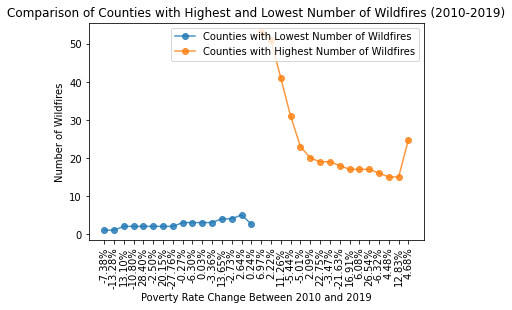

In [17]:
plt.plot('Poverty Rate Change Between 2010 and 2019','Number of Wildfires', data=lowest_averages, marker='o', alpha=0.8, label="Counties with Lowest Number of Wildfires")
plt.plot('Poverty Rate Change Between 2010 and 2019', 'Number of Wildfires', data=final_highest_wildfires, marker='o', alpha=0.8, label="Counties with Highest Number of Wildfires")
plt.legend()
plt.xticks(rotation=90)
plt.title("Comparison of Counties with Highest and Lowest Number of Wildfires (2010-2019)")
plt.ylabel('Number of Wildfires')
plt.xlabel('Poverty Rate Change Between 2010 and 2019')
plt.show()

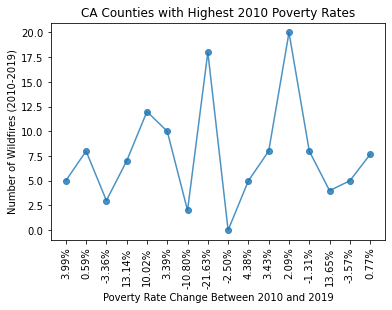

In [18]:
plt.plot('Poverty Rate Change Between 2010 and 2019', 'Number of Wildfires', data=final_highest_2010_poverty, marker='o', alpha=0.8)
plt.title("CA Counties with Highest 2010 Poverty Rates")
plt.ylabel('Number of Wildfires (2010-2019)')
plt.xlabel('Poverty Rate Change Between 2010 and 2019')
plt.xticks(rotation=90)
plt.show()

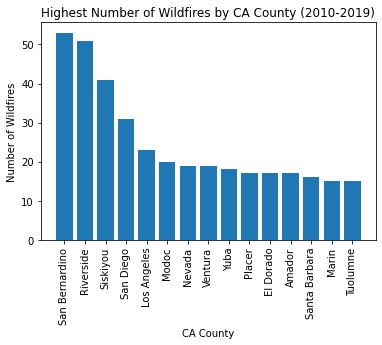

In [26]:
#Wildfire Bar Graphs
plt.bar((cleaned_merged_df['County Name']), (cleaned_merged_df['Number of Wildfires']))
plt.title("Highest Number of Wildfires by CA County (2010-2019)")
plt.xlabel("CA County")
plt.xticks(rotation = 90)
plt.ylabel("Number of Wildfires")
#plt.show()
plt.savefig("angela_pngs/barchart_most_wildfires.png")

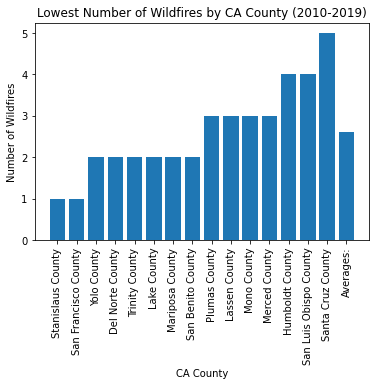

In [27]:
plt.bar((lowest_averages['County Name']), (lowest_averages['Number of Wildfires']))
plt.title("Lowest Number of Wildfires by CA County (2010-2019)")
plt.xlabel("CA County")
plt.xticks(rotation = 90)
plt.ylabel("Number of Wildfires")
#plt.show()
plt.savefig("angela_pngs/barchart_least_wildfires.png")

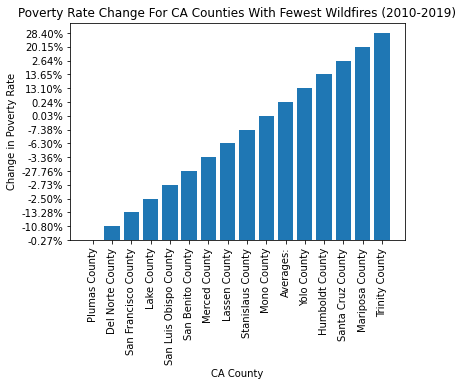

In [20]:
new = lowest_averages.sort_values(by=["Poverty Rate Change Between 2010 and 2019"], ascending=True)

plt.bar((new['County Name']), (new['Poverty Rate Change Between 2010 and 2019']))
plt.title("Poverty Rate Change For CA Counties With Fewest Wildfires (2010-2019)")
plt.xlabel("CA County")
plt.xticks(rotation = 90)
plt.ylabel("Change in Poverty Rate")
plt.show()

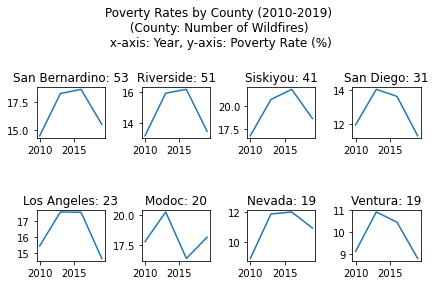

In [21]:
#Create graphs for counties with most wildfires
year= [2010, 2013, 2016, 2019]
san_bernardino = [14.51, 18.24, 18.61, 15.52]
riverside = [13.2, 15.95, 16.2, 13.49]
siskiyou = [16.75, 20.71, 21.81, 18.64]
san_diego = [11.95, 14.07, 13.65, 11.3]
los_angeles = [15.46, 17.56, 17.54, 14.68]
modoc = [17.8, 20.25, 16.41, 18.17]
nevada = [8.9, 11.87, 12, 10.93]
ventura = [9.13, 10.91, 10.45, 8.81]

fig, ax = plt.subplots(2, 4)
fig.tight_layout()
fig.tight_layout(h_pad=8)

plt.subplot(2,4,1)
plt.plot(year, san_bernardino)
plt.title("San Bernardino: 53")

plt.subplot(2,4,2)
plt.plot(year, riverside)
plt.title("Riverside: 51")

plt.subplot(2,4,3)
plt.plot(year, siskiyou)
plt.title("Siskiyou: 41")

plt.subplot(2,4,4)
plt.plot(year, san_diego)
plt.title("San Diego: 31")

plt.subplot(2,4,5)
plt.plot(year, los_angeles)
plt.title("Los Angeles: 23")

plt.subplot(2,4,6)
plt.plot(year, modoc)
plt.title("Modoc: 20")

plt.subplot(2,4,7)
plt.plot(year, nevada)
plt.title("Nevada: 19")

plt.subplot(2,4,8)
plt.plot(year, ventura)
plt.title("Ventura: 19")

fig.suptitle('Poverty Rates by County (2010-2019)\n (County: Number of Wildfires) \n x-axis: Year, y-axis: Poverty Rate (%)')
plt.subplots_adjust(top=0.7)
# plt.show()
plt.savefig("angela_pngs/highest_wildfires_counties.png")

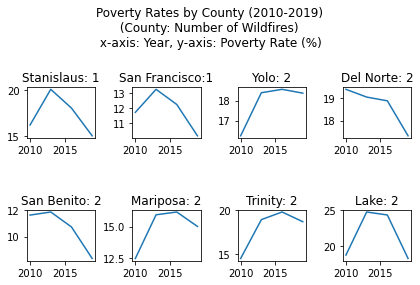

In [22]:
#creating graphs for counties with least wildfire numbers
year= [2010, 2013, 2016, 2019]
stanislaus = [16.18, 20.1, 18.04, 14.99]
san_francisco = [11.73, 13.25, 12.25, 10.18]
yolo = [16.24, 18.39, 18.56, 18.37]
del_norte = [19.41, 19.06, 18.89, 17.31]
trinity = [14.54, 18.91, 19.77, 18.68]
lake = [18.78, 24.69, 24.28, 18.31]
mariposa = [12.5, 15.92, 16.14, 15.01]
san_benito = [11.6, 11.83, 10.72, 8.38]

fig, ax = plt.subplots(2, 4)
fig.tight_layout()
fig.tight_layout(h_pad=8)

plt.subplot(2,4,1)
plt.plot(year, stanislaus)
plt.title("Stanislaus: 1")

plt.subplot(2,4,2)
plt.plot(year, san_francisco)
plt.title("San Francisco:1")

plt.subplot(2,4,3)
plt.plot(year, yolo)
plt.title("Yolo: 2")

plt.subplot(2,4,4)
plt.plot(year, del_norte)
plt.title("Del Norte: 2")

plt.subplot(2,4,5)
plt.plot(year, san_benito)
plt.title("San Benito: 2")

plt.subplot(2,4,6)
plt.plot(year, mariposa)
plt.title("Mariposa: 2")

plt.subplot(2,4,7)
plt.plot(year, trinity)
plt.title("Trinity: 2")

plt.subplot(2,4,8)
plt.plot(year, lake)
plt.title("Lake: 2")


fig.suptitle('Poverty Rates by County (2010-2019)\n (County: Number of Wildfires) \n x-axis: Year, y-axis: Poverty Rate (%)')
plt.subplots_adjust(top=0.7)
# plt.show()
plt.savefig("angela_pngs/lowest_wildfires_counties.png")

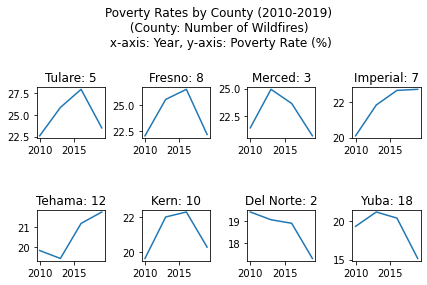

In [23]:
#Create graphs for counties with highest 2010 poverty rates
year = [2010, 2013, 2016, 2019]
tulare = [22.59, 25.82, 27.89, 23.49]
fresno = [22.04, 25.5, 26.46, 22.17]
merced = [21.44, 24.93, 23.65, 20.72]
imperial = [20.1, 21.85, 22.68, 22.74]
tehama = [19.81, 19.4, 21.21, 21.8]
kern = [19.61, 22.02, 22.31, 20.27]
del_norte = [19.41, 19.06, 18.9, 17.31]
yuba = [19.34, 21.21, 20.41, 15.15]

fig, ax = plt.subplots(2, 4)
fig.tight_layout()
fig.tight_layout(h_pad=8)

plt.subplot(2,4,1)
plt.plot(year, tulare)
plt.title("Tulare: 5")

plt.subplot(2,4,2)
plt.plot(year, fresno)
plt.title("Fresno: 8")

plt.subplot(2,4,3)
plt.plot(year, merced)
plt.title("Merced: 3")

plt.subplot(2,4,4)
plt.plot(year, imperial)
plt.title("Imperial: 7")

plt.subplot(2,4,5)
plt.plot(year, tehama)
plt.title("Tehama: 12")

plt.subplot(2,4,6)
plt.plot(year, kern)
plt.title("Kern: 10")

plt.subplot(2,4,7)
plt.plot(year, del_norte)
plt.title("Del Norte: 2")

plt.subplot(2,4,8)
plt.plot(year, yuba)
plt.title("Yuba: 18")

fig.suptitle('Poverty Rates by County (2010-2019)\n (County: Number of Wildfires) \n x-axis: Year, y-axis: Poverty Rate (%)')
plt.subplots_adjust(top=0.7)
# plt.show()
plt.savefig("angela_pngs/highest_2010_poverty_rates.png")